**Proyecto final del curso MA5406-1 "Probabilidad y Estadística en el Análisis de Datos" - Otoño 2019**

Desde tiempo inmemoriales la conquista entre parejas ha sido una parte fundamental de la sociedad,
permitiendo generar familias y comunidades, ayudando a la supervivencia como especia. Hoy en día
la sociedad va cambiando donde el “juego” de conquista entre parejas se va adaptando con las nuevas
tecnologías, hoy existen aplicaciones de teléfono que permiten conocer gente de forma casi instantánea
lo que cambia los paradigmas de como la gente encuentra pareja.

En el presente proyecto se mostrará la exploración de una base de datos de citas express, que consta en
una encuesta hecha a los participantes a través de un experimento de citas rápidas donde solo tienen
cuatro minutos para conocer a la otra persona y tomar la decisión si quiere una segunda cita, si ambos
coinciden se tiene un Match y pueden intercambiar información. Donde la predicción se realizará usando árboles de regresión y clasificación.

Para más detalle ver el informe asociado.

Autor: Alejandro Cuevas Acuña


Parte de la exploracion de datos y visualizacion fue inspirado por:

https://www.kaggle.com/aeshen/the-secret-to-getting-the-second-date

https://www.kaggle.com/minjeongk/the-most-important-attribute-for-men-and-women


Los datos fueron obtenidos de:

https://www.kaggle.com/annavictoria/speed-dating-experiment

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import utils as utils

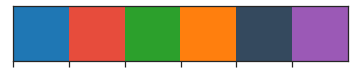

In [2]:
utils.set_style()

# Cargar datos

In [3]:
df = pd.read_csv('data/Speed_Dating_Data.csv', encoding = 'ISO-8859-1')

## Histogramas de géneros por sesión

0 - Mujeres

1 - Hombres

En cada una de las 21 sesiones, se obtiene el histograma de generos, se puede ver que en algunos casos hay desigualdad de integrantes, por lo que algunos individuos deben haber participado en más de una cita.

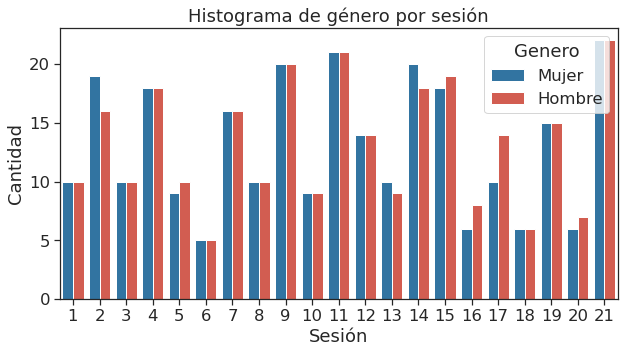

In [4]:
unique, idx = np.unique(df['iid'], return_index=True)

ax = sns.countplot(x='wave', hue='gender', data=df.iloc[idx])
plt.xlabel('Sesión')
plt.ylabel('Cantidad')
plt.title('Histograma de género por sesión');

legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Mujer','Hombre'], title='Genero');
# plt.savefig('img/gender_hist.pdf', bbox_inches='tight')

# Preprocesamiento

* Se eliminan columnas que tengan más de $400$ NaNs
* Se eliminan filas the tengan valores NaN

Se conservan 85, de un total de 195 atributos.


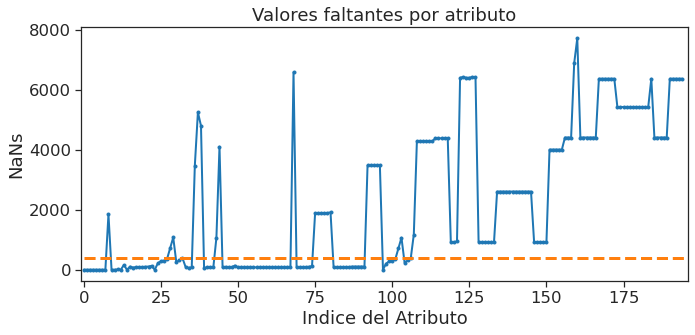

In [5]:
tresh = 400
(df.isnull().sum() > tresh).sum()

print('Se conservan {}, de un total de {} atributos.'.format(df.shape[1] -
                                                             (df.isnull().sum() > tresh).sum(), df.shape[1]))

plt.plot(df.isnull().sum().values, '.-', lw=2)
plt.plot([0, 195],  [tresh, tresh], '--', lw=3, c=sns.color_palette()[3])
plt.xlabel('Indice del Atributo')
plt.ylabel('NaNs')
plt.title('Valores faltantes por atributo')
plt.xlim(-1, 196)
plt.tight_layout();
# plt.savefig('img/nans.pdf')

Se eliminan filas the tengan valores NaN

In [6]:
df2 = df.iloc[:, (df.isnull().sum() <= tresh).values]
df3 = df2.dropna()

# tamaño final
df3.shape

(6777, 85)

Las columnas finales que se usarán son:

In [7]:
list(df3.columns)

['iid',
 'id',
 'gender',
 'idg',
 'condtn',
 'wave',
 'round',
 'position',
 'order',
 'partner',
 'pid',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field',
 'field_cd',
 'race',
 'imprace',
 'imprelig',
 'from',
 'goal',
 'date',
 'go_out',
 'career',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'dec',
 'attr',
 'sinc',
 'intel',
 'fun',
 'like',
 'prob',
 'met']

# Exploración de los datos

## Distribución de edades

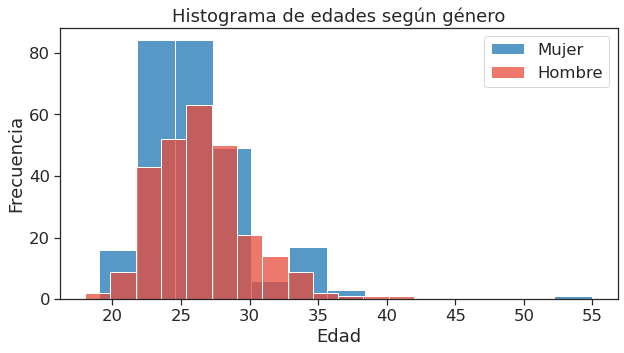

In [8]:
# distribucion de edad de los participantes
unique, idx = np.unique(df3['iid'], return_index=True)

ax = sns.histplot(df3.iloc[idx][(df3.iloc[idx]['gender']==0).values]['age'], kde=False, bins=13, label=0)
sns.histplot(df3.iloc[idx][(df3.iloc[idx]['gender']==1).values]['age'], kde=False, bins=13, label=1,
             color=sns.color_palette()[1])
plt.legend()
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de edades según género')
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Mujer','Hombre']);


# plt.savefig('img/age_dist.pdf', bbox_inches='tight')

## Distribución de razas

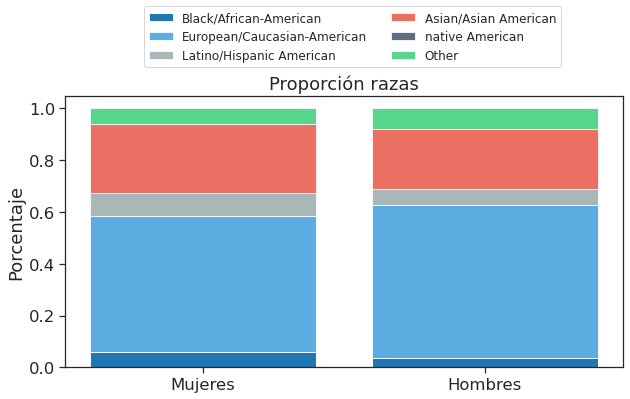

In [9]:
# obtener personas unicas
unique, idx = np.unique(df3['iid'], return_index=True)

race_name = ['Black/African-American', 'European/Caucasian-American', 'Latino/Hispanic American',
            'Asian/Asian American', 'native American', 'Other']

# raza de mujeres
race_female = df3.iloc[idx][df3.iloc[idx]['gender']==0]['race']

# raza de hombres
race_male = df3.iloc[idx][df3.iloc[idx]['gender']==1]['race']

# proporcion de cada raza para mujeres
race_prop_female = np.bincount(race_female)[1:]
race_prop_female = race_prop_female / len(df3.iloc[idx][df3.iloc[idx]['gender']==0])

# proporcion de cada raza para hombres
race_prop_male = np.bincount(race_male)[1:]
race_prop_male = race_prop_male / len(df3.iloc[idx][df3.iloc[idx]['gender']==1])

#############
# Plot
#############
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

plt.bar([0, 1], [race_prop_female[0], race_prop_male[0]], label=race_name[0])

for i in range(1, 6):
    plt.bar([0, 1],
            [race_prop_female[i], race_prop_male[i]],
            bottom=[race_prop_female[:i].sum(), race_prop_male[:i].sum()],
           color=sns.color_palette(flatui)[i],
           alpha=0.8, label=race_name[i])
    
plt.ylim(0, 1.05)
plt.legend(fontsize=12, bbox_to_anchor=(0.4, 0., 0.5, 1.35), ncol=2)
plt.xticks([0,1], labels=['Mujeres', 'Hombres'])
plt.ylabel('Porcentaje')
plt.title('Proporción razas');

# plt.savefig('img/race_dist.pdf', bbox_inches='tight')

## Distribución de Matches

Calculemos la proporcion de gente que obtuvo un match

In [10]:
match_prop = df3['match'].sum() / len(df3['match']) * 100

print('Un {:.2f}% de las citas fueron un match'.format(match_prop))

Un 17.53% de las citas fueron un match


y de esa gente, la proporcion para cada genero

In [11]:
f_match_prop = df3.iloc[(df3['gender']==0).values]['match'].sum() /len(
    df3.iloc[(df3['gender']==0).values]['match']) * 100

m_match_prop = df3.iloc[(df3['gender']==1).values]['match'].sum() /len(
    df3.iloc[(df3['gender']==1).values]['match']) * 100

print("Porcentaje de match de mujeres: {:.2f}%".format(f_match_prop))
print("Porcentaje de match de hombres: {:.2f}%".format(m_match_prop))

Porcentaje de match de mujeres: 17.45%
Porcentaje de match de hombres: 17.61%


## Despues del match, cuantos lograron una segunda cita?

In [12]:
second_match_rate =  df['date_3'].sum() / len(df) * 100
print('Un {:.2f}% de los match logro una segunda cita'.format(second_match_rate))

Un 17.88% de los match logro una segunda cita


## Decisiones unilaterales

Exploremos cuanto los hombres y mujeres quieren un match, la variable `dec_o` muestra si la pareja quiere un match, mientras la variable `dec` es la decición de la persona quiere un match. Por lo tanto un _rechazo_ es cuando `dec_o=0` y `dec=1`.

In [13]:
women_df = df3[df3['gender']==0]

reject_f = women_df[women_df['dec']==1]['dec_o'].sum() / len(women_df[women_df['dec']==1])

print('Mujeres son rechazadas un {:.2f}%'.format(100 - reject_f * 100))

Mujeres son rechazadas un 54.53%


In [14]:
men_df = df3[df3['gender']==1]

reject_m = men_df[men_df['dec']==1]['dec_o'].sum() / len(men_df[men_df['dec']==1])

print('Hombres son rechazados un {:.2f}%'.format(100 - reject_m * 100))

Hombres son rechazados un 63.99%


## Como la gente se compara consigo misma respecto a los demas
Estos son los 6 atributos de la encuesta, 
- Atractivo (Atractive)
- Sinceridad (Sincere)
- Inteligencia (Inteligent)
- Sentido del humor (Fun)
- Ambición (Ambitious)
- Intereses mutios (Shared interets/hobbies)

En cada cita la gente se valora a si misma a su cita, por lo que podemos tener un estimado de que tan certera es la auto evaluación.

__Primero normalizamos los atributos, escalando las waves 6-7-8-9 porque estan tienen valores de 1 a 10, en vez de una valoracion de 1 a 100 como en los otros casos__

In [15]:
# atributos a normalizar

# que buscan en las parejas (escala 100pt)
attr_11 = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']

# que piensan que los demas buscan (escala 100pt)
attr_21 = ['attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1']

# auto valoracion (escala 0-10)
attr_31 = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']

# como valoraron a sus parejas (escala 0-10)
attr_ = ['attr', 'sinc', 'intel', 'fun', 'like', 'prob',]

# normalizar
df3.loc[:, attr_11] = (df3.loc[:, attr_11].T / df3[attr_11].sum(1) * 100).T.copy()
df3.loc[:, attr_21] = (df3.loc[:, attr_21].T / df3[attr_21].sum(1) * 100).T.copy()

# que buscan las mujeres en hombres
atr_f2m = df3[df3['gender']==0][attr_11].mean(0).values

# que piensan los hombres que las mujeres buscan en hombres
atr_f2m_r = df3[df3['gender']==1][attr_21].mean(0).values

# que buscan los hombres en mujeres
atr_m2f = df3[df3['gender']==1][attr_11].mean(0).values

# que piensan las mujeres que los hombres buscan en mujeres
atr_m2f_r = df3[df3['gender']==0][attr_21].mean(0).values

/home/alejandro/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


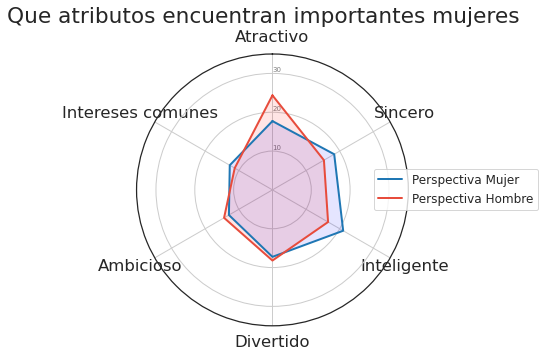

In [16]:
# spider plot
# atributos a graficar
atributes = ['Atractivo', 'Sincero', 'Inteligente', 'Divertido', 'Ambicioso', 'Intereses comunes']
N = 6
 
# el angulo de cada eje depende del numero de variables
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 
# Inicializar plot
ax = plt.subplot(111, polar=True)
 
# Primer eje en angulo 0
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# ylabels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10","20", "30"], color="grey", size=7)
plt.ylim(0,35)

# agregar plot
ax.plot(angles, np.r_[atr_f2m, atr_f2m[0]], '-', lw=2, label="Perspectiva Mujer")
ax.fill(angles, np.r_[atr_f2m, atr_f2m[0]], 'b', alpha=0.1)

ax.plot(angles, np.r_[atr_f2m_r, atr_f2m_r[0]], lw=2, linestyle='solid',
        label="Perspectiva Hombre")
ax.fill(angles, np.r_[atr_f2m_r, atr_f2m_r[0]],'r', alpha=0.1)

plt.xticks(angles[:-1], atributes)

plt.legend(fontsize=12, bbox_to_anchor=(0.5, 0., 1, 0.6))

plt.suptitle('Que atributos encuentran importantes mujeres', y=1.01);

# plt.savefig('img/attr_females.pdf', bbox_inches='tight')

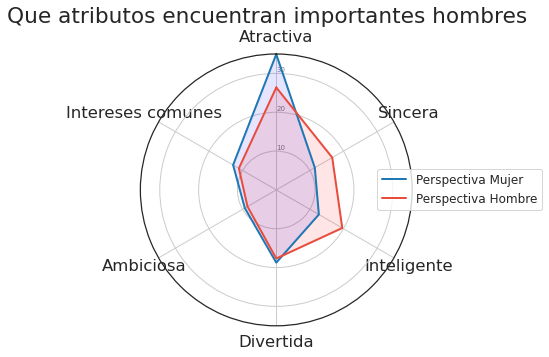

In [17]:
# spider plot
atributes = ['Atractiva', 'Sincera', 'Inteligente', 'Divertida', 'Ambiciosa', 'Intereses comunes']
N = 6
 
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]
 

ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
 
# ylabels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30], ["10","20", "30"], color="grey", size=7)
plt.ylim(0,35)

# plots
ax.plot(angles, np.r_[atr_m2f_r, atr_m2f_r[0]], lw=2, linestyle='solid',
        label="Perspectiva Mujer")
ax.fill(angles, np.r_[atr_m2f_r, atr_m2f_r[0]], 'b', alpha=0.1)

ax.plot(angles, np.r_[atr_m2f, atr_m2f[0]], '-', lw=2, label="Perspectiva Hombre")
ax.fill(angles, np.r_[atr_m2f, atr_m2f[0]], 'r', alpha=0.1)


plt.xticks(angles[:-1], atributes)
plt.legend(fontsize=12, bbox_to_anchor=(0.5, 0., 1, 0.6))
plt.suptitle('Que atributos encuentran importantes hombres', y=1.01);

# plt.savefig('img/attr_males.pdf', bbox_inches='tight')

## Que tan buena es la genet valorandose a si misma?

In [18]:
atr_names = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'gender']

# differencia entre autovaloracion y lo que los demas piensan
dif_females = df3[df3['gender']==0][attr_31[:4]].values - df3[df3['gender']==0][attr_[:4]].values

dif_males = df3[df3['gender']==1][attr_31[:4]].values - df3[df3['gender']==1][attr_[:4]].values

In [19]:
gender = np.r_[np.zeros(dif_females.shape[0]), np.ones(dif_males.shape[0])]
# contatenate dif
violin_data = np.r_[dif_females, dif_males]

# contantete dif and gender
violin_data = np.c_[violin_data, gender]

violin_data.shape

(6777, 5)

In [20]:
# generar dataframe para graficar
violin_df = pd.DataFrame(data=violin_data, columns=atr_names)
violin_df = pd.melt(violin_df, id_vars=['gender'])

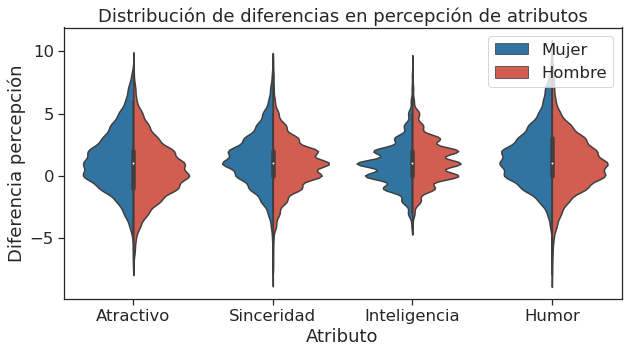

In [21]:
ax = sns.violinplot(x='variable', y='value', data=violin_df, split=True, hue='gender')
plt.legend(loc=9)
plt.xlabel('Atributo')
plt.ylabel('Diferencia percepción')
plt.title('Distribución de diferencias en percepción de atributos');
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Mujer','Hombre'])
# plt.savefig('img/diff_distr.pdf', bbox_inches='tight')

# Modelos para decisión unilateral


Intentemos predecir solo la decisión de un participante, es decir, si una persona le gusta su pareja o usando como predictores:
1. Los 6 atributos de las pareja.
2. La correlación entre los intereses.
3. Si tienen la misma raza.
4. Genero.

Con esos atributos, intentaremos hacer 2 predicciones:
1. Un clasificador, que prediga si la persona quiere una segunda cita o no (independiente de lo que quiere la otra persona)
2. Un regresor, para predecir cuanto le gusta (de 0 a 10) la otra persona.

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# clasificadores
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# regresores
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## Modelo de _clasificación_ sobre la decisión de la persona sobre una segunda cita

__Modelos a usar__
Se usarán los siguientes modelos:

* Decision Tree
* Random Forest
* XGBOOST

preparar los datos para el uso de los modelos

In [23]:
# columnas usadas para prediccion
x_cols = [
    'attr',
    'sinc',
    'intel',
    'fun',
    'int_corr',
    'samerace',
    'gender']


# target para classification
y1_cols = ['dec']
# target para regression
y2_cols = ['like']

X = df3[x_cols].values
y = df3[y1_cols].values.reshape(-1)

Se genera los conjunto de entrenamiento y test.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
np.corrcoef(df3[['like', 'dec']].values.T)

array([[1.        , 0.52001385],
       [0.52001385, 1.        ]])

In [26]:
# lista de clasificadores
clf_list = []

# numero de experimentos por cada modelos
n_trials = 100

# container de la accuracy obtenida
acc_total = np.zeros((n_trials, 3))

# decision tree
clf = DecisionTreeClassifier()
clf_list.append(clf)

# RF
clf = RandomForestClassifier(n_estimators=50)
clf_list.append(clf)

# XGBOOST
clf = XGBClassifier(n_estimators=50, n_jobs=2)
clf_list.append(clf)

Entrenamiento y predicción de los modelos

In [27]:
for idx, clf in enumerate(clf_list):
    for n in range(n_trials):
        # obtener random state para XGBOOST
        if idx == 2:
            clf.random_state = np.random.randint(1000)
        # fit
        clf.fit(X_train, y_train)
        # predict
        y_pred = clf.predict(X_test)
        acc_total[n, idx] = accuracy_score(y_test, y_pred)

acc_total.mean(0)

array([0.65574877, 0.70526598, 0.73535986])

In [28]:
# accuracy promedio
acc_total.mean(0)

array([0.65574877, 0.70526598, 0.73535986])

In [29]:
# desviacion de la accuracy
acc_total.std(0)

array([2.71408143e-03, 3.92360598e-03, 1.44328993e-15])

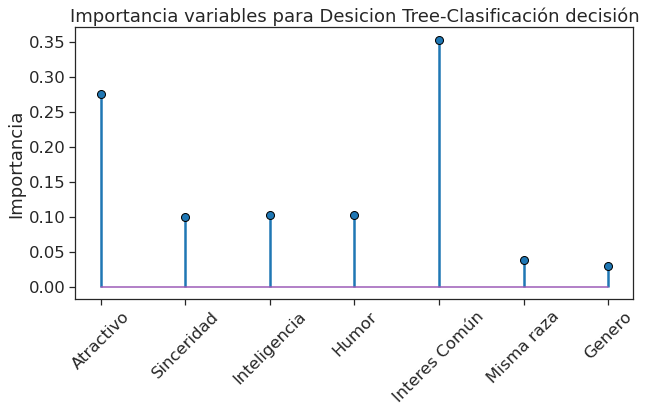

In [30]:
# reducción normalizada del gini
clf_list[0].feature_importances_

x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Genero']

# reduccion normalizada del MSE
(markerline, stemlines, baseline) = plt.stem(clf_list[0].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[5])
plt.setp(stemlines, color=sns.color_palette()[0], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[0], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para Desicion Tree-Clasificación decisión')
plt.xticks(np.arange(7), labels=x_labels, rotation=45);
# plt.savefig('img/exp1_dt.pdf', bbox_inches='tight')

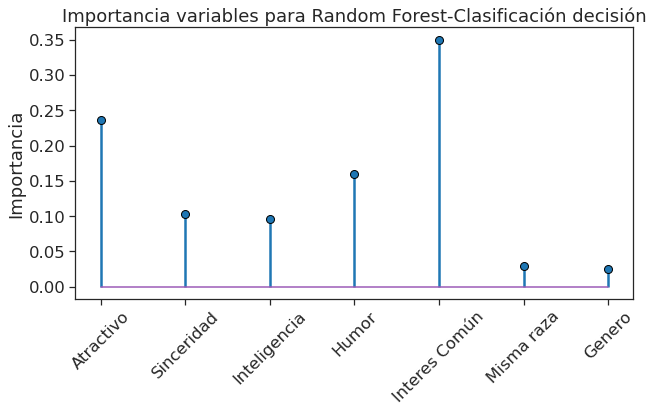

In [31]:
clf_list[1].feature_importances_

x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Genero']

# reduccion normalizada del MSE
(markerline, stemlines, baseline) = plt.stem(clf_list[1].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[5])
plt.setp(stemlines, color=sns.color_palette()[0], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[0], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para Random Forest-Clasificación decisión')
plt.xticks(np.arange(7), labels=x_labels, rotation=45);
# plt.savefig('img/exp1_rf.pdf', bbox_inches='tight')

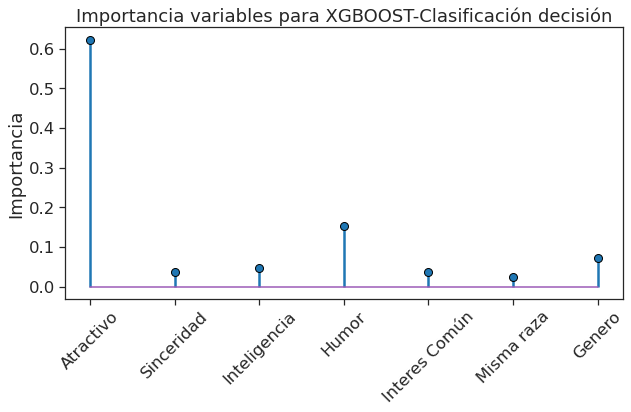

In [32]:
clf_list[2].feature_importances_

# reduccion normalizada del MSE
(markerline, stemlines, baseline) = plt.stem(clf_list[2].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[5])
plt.setp(stemlines, color=sns.color_palette()[0], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[0], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para XGBOOST-Clasificación decisión')
plt.xticks(np.arange(7), labels=x_labels, rotation=45);
# plt.savefig('img/exp1_xgb.pdf', bbox_inches='tight')

## Modelo de _regresión_ sobre cuanto le gusta su pareja

__Modelos a usar__
Se usarán los siguientes modelos:

* Decision Tree
* Random Forest
* XGBOOST

In [33]:
# redefinir el dataset para que sea un problema de regresion
X = df3[x_cols].values
y = df3[y2_cols].values.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# lista de modelos
reg_list = []

# número de experimentos
n_trials = 100

err_total = np.zeros((n_trials, 3))

# decision tree
reg = DecisionTreeRegressor()
reg_list.append(reg)

# RF
reg = RandomForestRegressor(n_estimators=50)
reg_list.append(reg)

# XGBOOST
reg = XGBRegressor(n_estimators=50, n_jobs=2)
reg_list.append(reg)

Entrenamiento y predicción de los modelos

In [35]:
for idx, reg in enumerate(reg_list):
    for n in range(n_trials):
        if idx == 2:
            reg.random_state = np.random.randint(1000)
        # fit
        reg.fit(X_train, y_train)
        # predict
        y_pred = reg.predict(X_test)
        err_total[n, idx] = np.abs(y_test - y_pred).mean()

In [36]:
# error abosuluto medio, promedio
err_total.mean(0)

array([1.19056132, 0.9127405 , 0.84523847])

In [37]:
err_total.std(0)

array([7.07478814e-03, 3.11414858e-03, 1.22124533e-15])

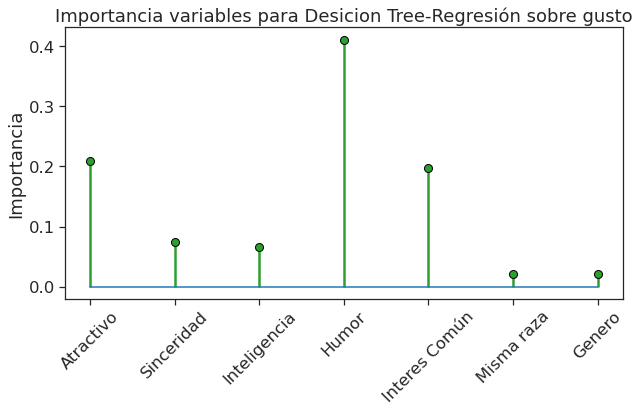

In [38]:
x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Genero']

# reduccion normalizada del MSE
(markerline, stemlines, baseline) = plt.stem(reg_list[0].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[0])
plt.setp(stemlines, color=sns.color_palette()[2], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[2], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para Desicion Tree-Regresión sobre gusto')
plt.xticks(np.arange(7), labels=x_labels, rotation=45);
# plt.savefig('img/exp2_dt.pdf', bbox_inches='tight')

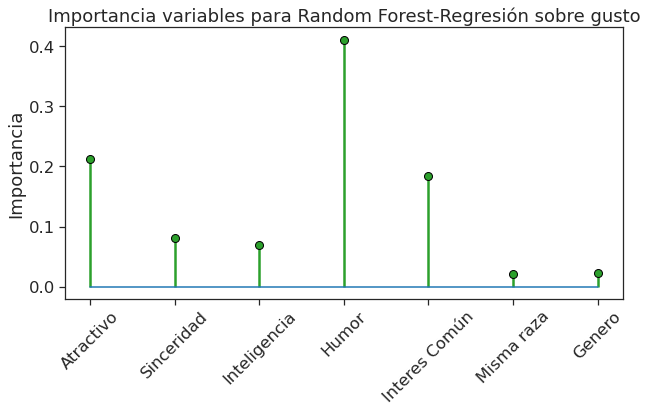

In [39]:
# reduccion normalizada del MSE
reg_list[1].feature_importances_

x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Genero']

# normalized total reduction of mse
(markerline, stemlines, baseline) = plt.stem(reg_list[1].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[0])
plt.setp(stemlines, color=sns.color_palette()[2], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[2], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para Random Forest-Regresión sobre gusto')
plt.xticks(np.arange(7), labels=x_labels, rotation=45);
# plt.savefig('img/exp2_rf.pdf', bbox_inches='tight')

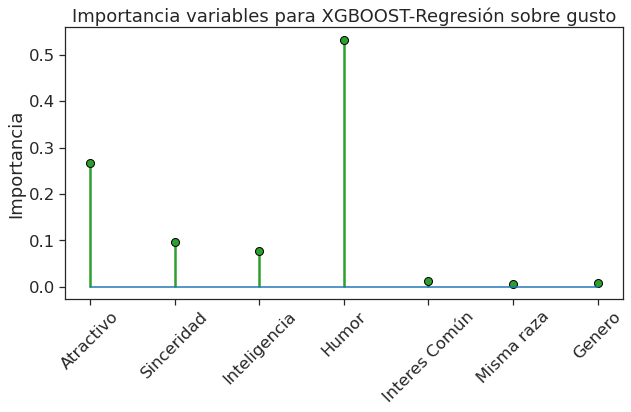

In [40]:
reg_list[2].feature_importances_

x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Genero']

# normalized total reduction of mse
(markerline, stemlines, baseline) = plt.stem(reg_list[2].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[0])
plt.setp(stemlines, color=sns.color_palette()[2], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[2], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para XGBOOST-Regresión sobre gusto')
plt.xticks(np.arange(7), labels=x_labels, rotation=45);
# plt.savefig('img/exp2_xgb.pdf', bbox_inches='tight')

# Modelo para predecir match

**Can we predict a match???**

As now we want to predict a match, we will use the previous regresor pluss the the rating made by the partner

In [41]:
# columnas de atributos
x_cols = [
    'attr',
    'sinc',
    'intel',
    'fun',
    'int_corr',
    'samerace',
    'attr_o',
    'sinc_o',
    'intel_o',
    'fun_o',
]

# target de la clasificación
y_cols = ['match']


X = df3[x_cols].values
y = df3[y_cols].values.reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Entrenamiento y predicción de los modelos

In [42]:
clf_list = []

# numero de experimentos
n_trials = 100

acc_total = np.zeros((n_trials, 3))

# decision tree
clf = DecisionTreeClassifier()
clf_list.append(clf)

# RF
clf = RandomForestClassifier(n_estimators=50)
clf_list.append(clf)

# XGBOOST
clf = XGBClassifier(n_estimators=50, n_jobs=2)
clf_list.append(clf)

In [43]:
for idx, clf in enumerate(clf_list):
    for n in range(n_trials):
        if idx == 2:
            clf.random_state = np.random.randint(1000)
        # fit
        clf.fit(X_train, y_train)
        # predict
        y_pred = clf.predict(X_test)
        acc_total[n, idx] = accuracy_score(y_test, y_pred)

In [44]:
acc_total.mean(0)

array([0.76861422, 0.84261511, 0.85292803])

In [45]:
acc_total.std(0)

array([3.96767614e-03, 2.84082576e-03, 9.99200722e-16])

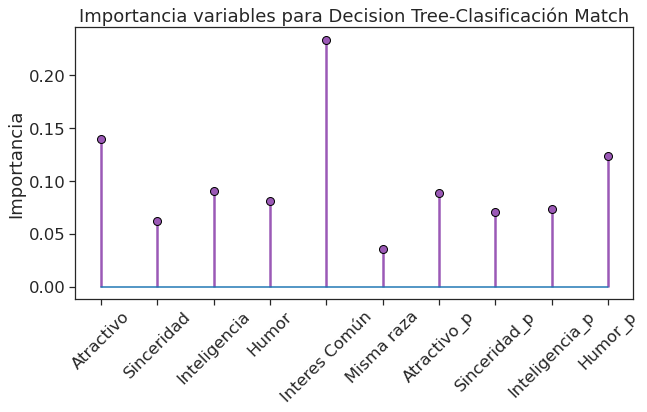

In [46]:
clf_list[0].feature_importances_

x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Atractivo_p',
           'Sinceridad_p', 'Inteligencia_p', 'Humor_p']

(markerline, stemlines, baseline) = plt.stem(clf_list[0].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[0])
plt.setp(stemlines, color=sns.color_palette()[5], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[5], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para Decision Tree-Clasificación Match')
plt.xticks(np.arange(len(x_labels)), labels=x_labels, rotation=45);
# plt.savefig('img/exp3_dt.pdf', bbox_inches='tight')

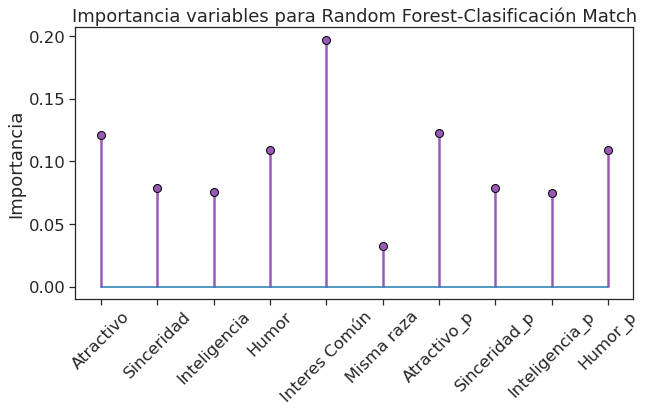

In [47]:
clf_list[1].feature_importances_

x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Atractivo_p',
           'Sinceridad_p', 'Inteligencia_p', 'Humor_p']

(markerline, stemlines, baseline) = plt.stem(clf_list[1].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[0])
plt.setp(stemlines, color=sns.color_palette()[5], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[5], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para Random Forest-Clasificación Match')
plt.xticks(np.arange(len(x_labels)), labels=x_labels, rotation=45);
# plt.savefig('img/exp3_rf.pdf', bbox_inches='tight')

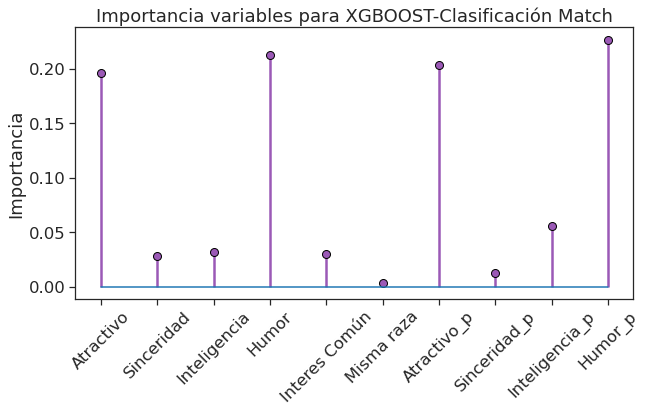

In [48]:
clf_list[2].feature_importances_

x_labels = ['Atractivo', 'Sinceridad', 'Inteligencia', 'Humor', 'Interes Común', 'Misma raza', 'Atractivo_p',
           'Sinceridad_p', 'Inteligencia_p', 'Humor_p']

(markerline, stemlines, baseline) = plt.stem(clf_list[2].feature_importances_)
plt.setp(baseline, color=sns.color_palette()[0])
plt.setp(stemlines, color=sns.color_palette()[5], linewidth=2.5)
plt.setp(markerline, color=sns.color_palette()[5], markersize=8, markeredgecolor='k')
plt.ylabel('Importancia')
plt.title('Importancia variables para XGBOOST-Clasificación Match')
plt.xticks(np.arange(len(x_labels)), labels=x_labels, rotation=45);
# plt.savefig('img/exp3_xgb.pdf', bbox_inches='tight')